In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
print("done importing")

done importing


In [9]:
# importing data
start_date = '2015-01-01'
end_date = '2021-01-01'
stocks = {'AAPL', 'TSLA'}
for stock in stocks:
    stock_data = yf.download(stock, start=start_date, end=end_date)

SP500 = yf.download("SPY", start=start_date)
AAPL = yf.download('AAPL', start=start_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# triming to last 5 years of data
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.297691,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.267143,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.405802,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.711330,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.965151,134247600
...,...,...,...,...,...,...
2022-02-14,167.369995,169.580002,166.559998,168.880005,168.880005,86185500
2022-02-15,170.970001,172.949997,170.250000,172.789993,172.789993,64286300
2022-02-16,171.850006,173.339996,170.050003,172.550003,172.550003,61177400


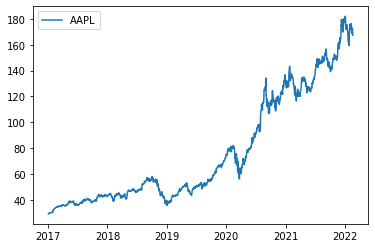

In [4]:
plt.plot(AAPL['Close'].loc['2000-01-01':], label = 'AAPL')
plt.legend()

In [5]:
# calculating interday returns
AAPL['Percent Change'] = AAPL['Close'].pct_change()
SP500['Percent Change'] = SP500['Close'].pct_change()

In [6]:
# calculating annualized historical volatility
trading_days = 252

window = 30
AAPL['Rolling Volatility'] = AAPL['Percent Change'].rolling(window).std()*(trading_days**0.5)

AAPL_volatility = AAPL['Percent Change'].std()*(trading_days**0.5)
print("AAPL volatility: " + str(AAPL_volatility))

AAPL volatility: 0.30462469258834424


In [7]:
# calculating beta
AAPL_SP500_covariance = AAPL['Percent Change'].cov(SP500['Percent Change'])
SP500_variance = SP500['Percent Change'].var()
AAPL_beta = AAPL_SP500_covariance / SP500_variance

print("AAPL SP500 covariance: " + str(AAPL_SP500_covariance))
print("SP500 variance: " + str(SP500_variance))
print("AAPL beta: " + str(AAPL_beta))

AAPL SP500 covariance: 0.00017549608449743862
SP500 variance: 0.00014280811061961055
AAPL beta: 1.2288943795699185
